In [23]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
reviews_data = pd.read_csv("reviews.csv", parse_dates=['Timestamp'])
reviews_data

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN
...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN


### Rating average by course

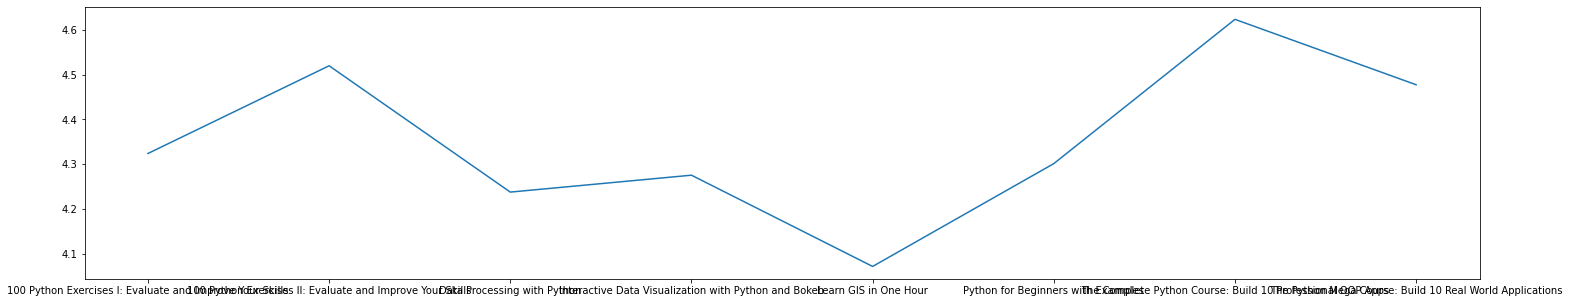

In [24]:
data = reviews_data.groupby(['Course Name']).mean()
plt.figure(figsize=(25, 5))
plt.plot(data.index, data['Rating'])

### Rating average by week

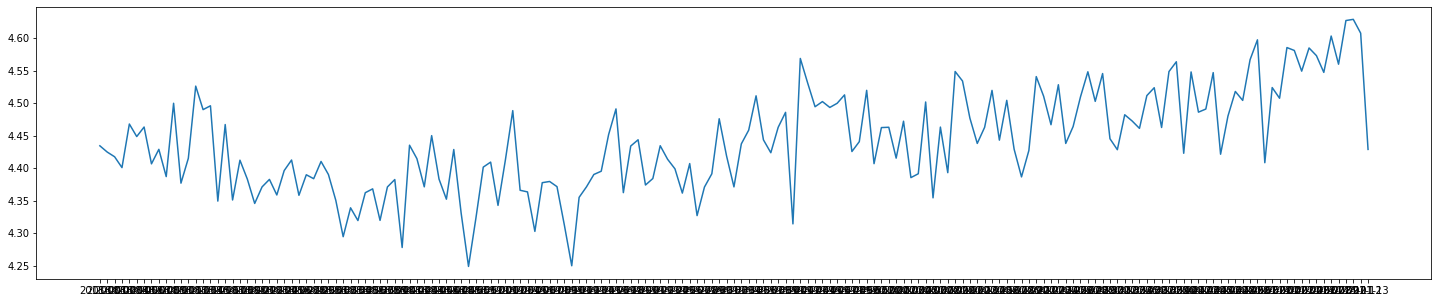

In [25]:
reviews_data['Week'] = reviews_data['Timestamp'].dt.strftime('%Y-%U')
avg_ratings_week = reviews_data.groupby(['Week']).mean()

plt.figure(figsize=(25, 5))
plt.plot(avg_ratings_week.index, avg_ratings_week['Rating'])

### Rating average by month

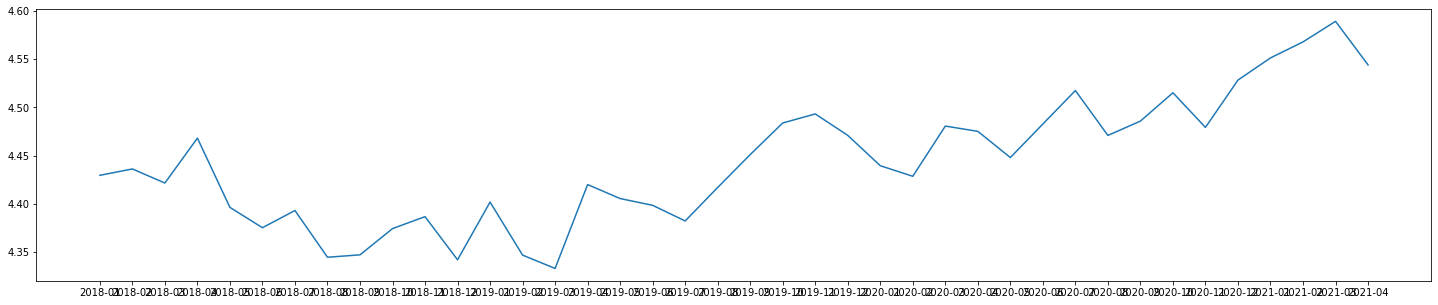

In [26]:
reviews_data['Month'] = reviews_data['Timestamp'].dt.strftime('%Y-%m')
avg_ratings_month = reviews_data.groupby(['Month']).mean()
plt.figure(figsize=(25, 5))
plt.plot(avg_ratings_month.index, avg_ratings_month['Rating'])

### Average rating by month for a particular course

<AxesSubplot:xlabel='Month'>

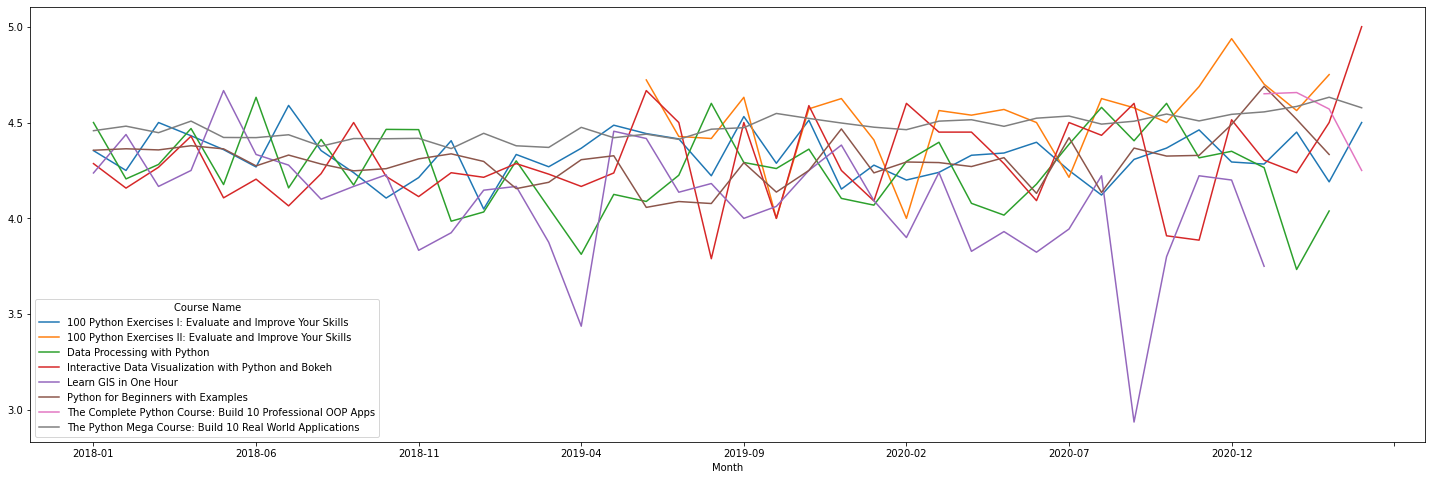

In [27]:
reviews_data['Month'] = reviews_data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = reviews_data.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()
month_average_crs.plot(figsize=(25,  8))

### Day wise average rating 

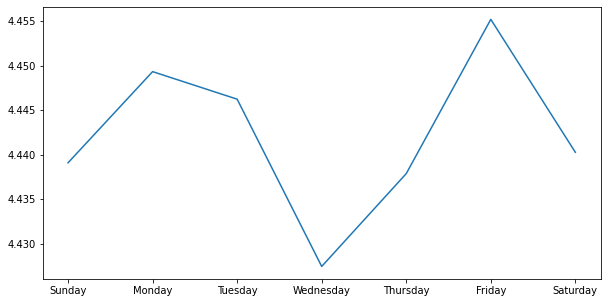

In [38]:
reviews_data['Week_Day'] = reviews_data['Timestamp'].dt.strftime('%A')
reviews_data['Day_Num'] = reviews_data['Timestamp'].dt.strftime('%w')

day_wise_avg_rating = reviews_data.groupby(['Week_Day', 'Day_Num']).mean().sort_values('Day_Num')

plt.figure(figsize=[10, 5])
plt.plot(day_wise_avg_rating.index.get_level_values(0), day_wise_avg_rating['Rating'])

### Number of ratings by course

([<matplotlib.patches.Wedge at 0x25a054d83d0>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

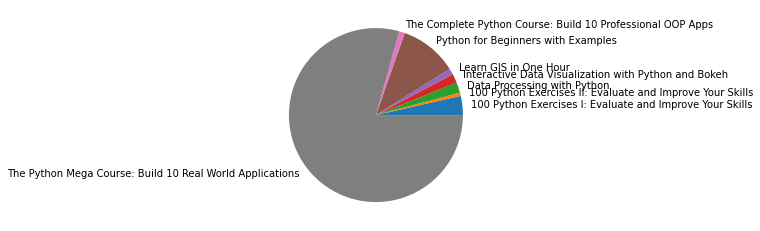

In [44]:
rating_share = reviews_data.groupby(['Course Name'])['Rating'].count()
rating_share

plt.pie(rating_share, labels=rating_share.index)